In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow import math

In [5]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [6]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

In [7]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=492, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [8]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [9]:
X = np.array(new_df.iloc[:, 0:29])
y = np.array(new_df['Class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [11]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Dense(units=87, activation='relu', input_dim=29))
model.add(Dense(units=2, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 738 samples
Epoch 1/100
738/738 - 0s - loss: 0.5961 - accuracy: 0.7805
Epoch 2/100
738/738 - 0s - loss: 0.5215 - accuracy: 0.8753
Epoch 3/100
738/738 - 0s - loss: 0.4734 - accuracy: 0.8645
Epoch 4/100
738/738 - 0s - loss: 0.4295 - accuracy: 0.8780
Epoch 5/100
738/738 - 0s - loss: 0.3886 - accuracy: 0.8930
Epoch 6/100
738/738 - 0s - loss: 0.3581 - accuracy: 0.9011
Epoch 7/100
738/738 - 0s - loss: 0.3375 - accuracy: 0.8970
Epoch 8/100
738/738 - 0s - loss: 0.3147 - accuracy: 0.8970
Epoch 9/100
738/738 - 0s - loss: 0.2944 - accuracy: 0.9038
Epoch 10/100
738/738 - 0s - loss: 0.2819 - accuracy: 0.9051
Epoch 11/100
738/738 - 0s - loss: 0.2703 - accuracy: 0.9079
Epoch 12/100
738/738 - 0s - loss: 0.2582 - accuracy: 0.9079
Epoch 13/100
738/738 - 0s - loss: 0.2553 - accuracy: 0.9173
Epoch 14/100
738/738 - 0s - loss: 0.2422 - accuracy: 0.9133
Epoch 15/100
738/738 - 0s - loss: 0.2357 - accuracy: 0.9146
Epoch 16/100
738/738 - 0s - loss: 0.2472 - accuracy: 0.9051
Epoch 17/100
738/738 - 0s - 

In [17]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

246/246 - 0s - loss: 0.1561 - accuracy: 0.9431
Loss: 0.1560781151662028, Accuracy: 0.9430894255638123


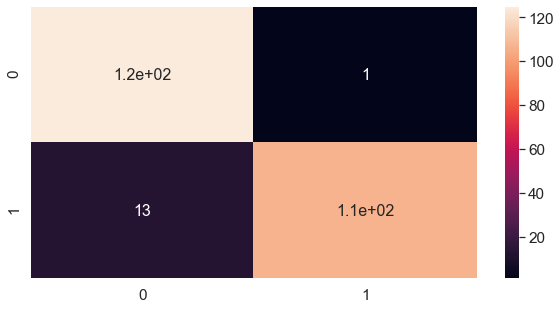

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_categorical.argmax(axis=1),model.predict(X_test_scaled).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(2),
                    range(2))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [20]:
cm

array([[125,   1],
       [ 13, 107]], dtype=int64)